# Pipeline accident cost prediction

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib as plt

# handle error messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'C:/Users/Alban de Boisjolly/Downloads/ENSAE/2. Python/Projet/database.csv'
df = pd.read_csv(path,delimiter=',')
print(df.shape)
print(df.info())

(2795, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                   

# Variables selection

In [3]:
df['Shutdown Duration'] = (pd.to_datetime(df['Restart Date/Time']) - pd.to_datetime(df['Shutdown Date/Time'])).astype('timedelta64[h]')
print(df['Shutdown Duration'].describe()) # hours

count     1341.000000
mean       188.287845
std        894.877681
min          0.000000
25%          5.000000
50%         20.000000
75%         70.000000
max      16746.000000
Name: Shutdown Duration, dtype: float64


In [4]:
'''
Notice: Net loss (Barrels) discloses some non-integer figures (0,89 ; 4,16 ; ...)
        Shutdown Duration has 1341 values only
'''
df.T

,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
Report Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,...,20170020,20170022,20170021,20170023,20170026,20170015,20170028,20170027,20170024,20170025
Supplemental Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,...,22026,22029,22027,22030,22044,22020,22046,22045,22032,22040
Accident Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,...,12/21/2016 11:40 AM,12/22/2016 9:25 PM,12/23/2016 3:00 PM,12/24/2016 9:35 AM,12/26/2016 7:20 AM,12/27/2016 8:40 AM,12/28/2016 4:20 PM,12/29/2016 6:40 AM,1/3/2017 10:00 AM,1/9/2017 7:40 AM
Operator ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,...,32147,32080,30829,31684,32011,32334,4906,39145,32147,30829
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,...,MARATHON PIPE LINE LLC,"CCPS TRANSPORTATION, LLC",ENTERPRISE CRUDE PIPELINE LLC,PHILLIPS 66 PIPELINE LLC,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",TC OIL PIPELINE OPERATIONS INC,EXXONMOBIL PIPELINE CO,ENBRIDGE STORAGE (CUSHING) L.L.C.,MARATHON PIPE LINE LLC,ENTERPRISE CRUDE PIPELINE LLC
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL,RED RIVER EAST,NaN,NaN,HULL STATION,NaN,TANK 1501,...,ELWOOD STATION,LINE 59 KEY STATION,ECHO MANIFOLD,"NT-90, PREDO TO CARSON",RUSSELL STATION,KEYSTONE,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,CUSHING CENTRAL TERMINAL,MIDLAND STATION,MARSHALL STATION
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,...,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,...,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,TANK,UNDERGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


# Data visualization

In [5]:
df['All Costs'].describe(), pd.value_counts(df['All Costs'].values==0)

(count    2.795000e+03
 mean     8.340332e+05
 std      1.657830e+07
 min      0.000000e+00
 25%      5.039500e+03
 50%      2.312900e+04
 75%      1.172325e+05
 max      8.405261e+08
 Name: All Costs, dtype: float64, False    2761
 True       34
 dtype: int64)

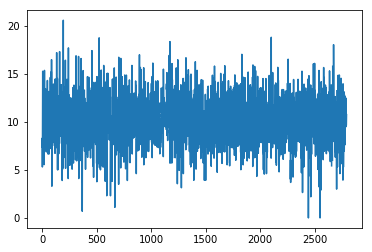

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.log(df['All Costs']))

In [7]:
df["Liquid Ignition"].value_counts(), df["Liquid Explosion"].value_counts()

(NO     2700
 YES      95
 Name: Liquid Ignition, dtype: int64, NO     2780
 YES      15
 Name: Liquid Explosion, dtype: int64)

In [8]:
f= df['Operator ID'].unique() # number of distinct operator
len(f)

213

In [9]:
df['Cause Category'].value_counts(), df['Cause Category'].describe()

(MATERIAL/WELD/EQUIP FAILURE    1435
 CORROSION                       592
 INCORRECT OPERATION             378
 ALL OTHER CAUSES                118
 NATURAL FORCE DAMAGE            118
 EXCAVATION DAMAGE                97
 OTHER OUTSIDE FORCE DAMAGE       57
 Name: Cause Category, dtype: int64, count                            2795
 unique                              7
 top       MATERIAL/WELD/EQUIP FAILURE
 freq                             1435
 Name: Cause Category, dtype: object)

In [10]:
df["Pipeline Type"].value_counts(), df['Pipeline Type'].describe()

(ABOVEGROUND        1475
 UNDERGROUND         985
 TANK                301
 TRANSITION AREA      16
 Name: Pipeline Type, dtype: int64, count            2777
 unique              4
 top       ABOVEGROUND
 freq             1475
 Name: Pipeline Type, dtype: object)

In [11]:
df["Liquid Type"].value_counts(), df["Liquid Type"].describe()

(CRUDE OIL                                               1398
 REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
 HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
 CO2 (CARBON DIOXIDE)                                      38
 BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
 Name: Liquid Type, dtype: int64, count          2795
 unique            5
 top       CRUDE OIL
 freq           1398
 Name: Liquid Type, dtype: object)

In [12]:
print(df.groupby(['Accident Year'])['All Costs'].mean())
print(df.groupby(['Accident Year'])['All Costs'].count())

Accident Year
2010    3.071983e+06
2011    7.928306e+05
2012    3.968509e+05
2013    6.945774e+05
2014    2.900540e+05
2015    5.491256e+05
2016    4.172569e+05
2017    4.361400e+04
Name: All Costs, dtype: float64
Accident Year
2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: All Costs, dtype: int64


In [13]:
print(pd.crosstab(df['Liquid Ignition'], df['Liquid Explosion']))

Liquid Explosion    NO  YES
Liquid Ignition            
NO                2700    0
YES                 80   15


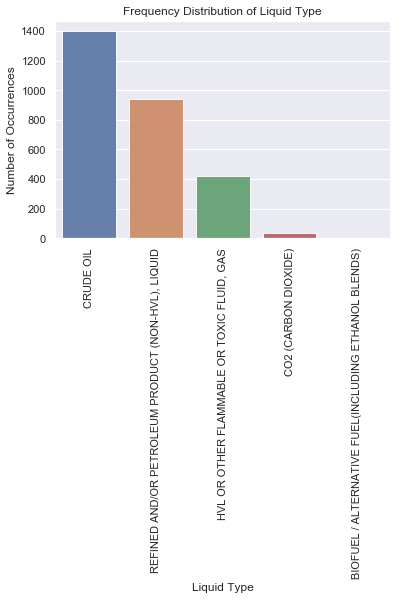

In [14]:
%matplotlib inline
Liquid_Type_count = df['Liquid Type'].value_counts() # newdf
sns.set(style="darkgrid")
sns.barplot(Liquid_Type_count.index, Liquid_Type_count.values, alpha=0.9, errwidth=0.1)
plt.title('Frequency Distribution of Liquid Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Liquid Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Pipeline Type')

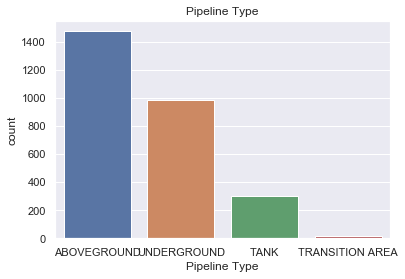

In [15]:
sns.countplot(df['Pipeline Type'])
plt.title('Pipeline Type')

Text(0.5, 1.0, 'Total costs per Pipeline Type')

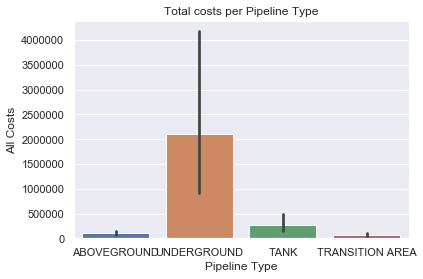

In [16]:
# Which Pipeline Type has highest cost ==> outliers are underground pipelines
df_PipeLine_Type_All_Cost = df[['Pipeline Type','All Costs']]
sns.barplot(x='Pipeline Type', y="All Costs",  data=df_PipeLine_Type_All_Cost)
plt.title('Total costs per Pipeline Type')

Text(0.5, 1.0, '# Net Loss (Barrels)')

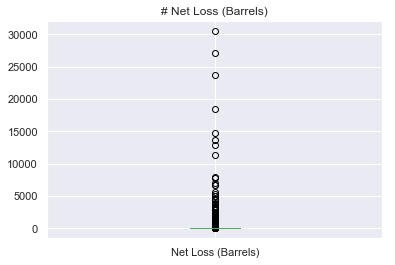

In [45]:
df.boxplot(column='Net Loss (Barrels)')
plt.title('# Net Loss (Barrels)')

# Outliers identification & Costs plots

(2795, 49)


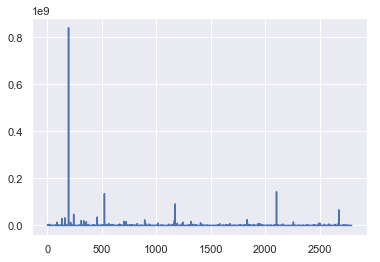

In [47]:
df['All Costs'].plot() # ==> 5 outliers identified
print(df.shape)

In [48]:
df['All Costs'].sort_values(ascending=False)[:5]

194     840526118
2103    142931884
523     135000000
1173     91300000
2675     66234072
Name: All Costs, dtype: int64

(2790, 49)


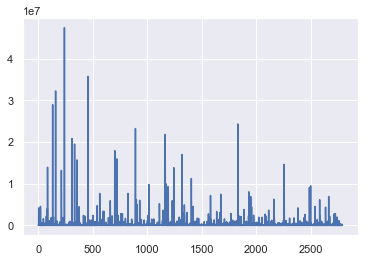

In [49]:
# Erase top 5 outliers:
df2 = df.copy()
df2 = df2.drop(df2.index[[194, 2103, 523, 1173, 2675]]) # index of top 5 outliers
df2['All Costs'].plot()
print(df2.shape)

In [50]:
# Top 5 outliers data
df.iloc[[194, 2103, 523, 1173, 2675]]
# remark: All these have neither Liquid Ignition nor Liquid Explosion, but high shutdown duration, high Emergency Response Costs

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Shutdown Duration
194,20100181,19909,2010,7/25/2010 5:58 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 6B,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,3000000.0,126118.0,23000000.0,177000000.0,635000000.0,2400000.0,840526118,1510.0
2103,20150224,21884,2015,5/19/2015 10:57 AM,300,"PLAINS PIPELINE, L.P.","LAS FLORES TO GAVIOTA 24""",ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,9868173.0,144000.0,0.0,90701042.0,22421933.0,19796736.0,142931884,NaN
523,20110262,20985,2011,7/1/2011 10:40 PM,4906,EXXONMOBIL PIPELINE CO,SILVERTIP TO BILLINGS 12 INCH CRUDE OIL PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,5000000.0,150000.0,7500000.0,100000000.0,0.0,22350000.0,135000000,2024.0
1173,20130151,20362,2013,3/29/2013 2:37 PM,12628,MOBIL PIPE LINE COMPANY,PEGASUS 20 INCH,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,900000.0,300000.0,0.0,64700000.0,20100000.0,5300000.0,91300000,NaN
2675,20160324,22042,2016,9/9/2016 11:10 AM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,1500000.0,734072.0,0.0,64000000.0,0.0,0.0,66234072,294.0


(2655, 49)


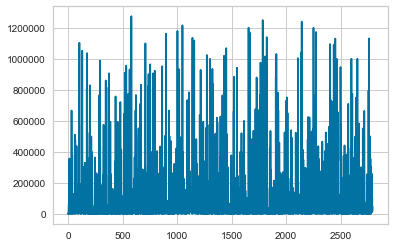

In [126]:
# Outliers: top 1% total costs:
df3 = df.copy()
a = round(5/100 * 2795)
b = df3['All Costs'].sort_values(ascending=False) [:a]
df3 = df3.drop(b.index) # exclusion of outliers
df3['All Costs'].plot()
print(df3.shape)

Text(0.5, 0, 'Index')

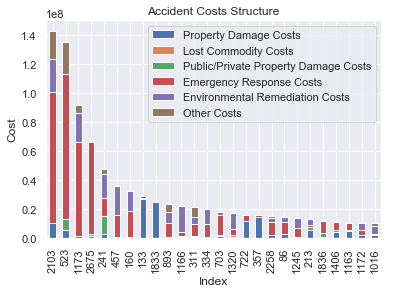

In [52]:
# Outliers plots
outliers = df.iloc[b.index[1:27], 41:-2] # except index 194= outlier 1
outliers.plot.bar(stacked=True)
plt.title('Accident Costs Structure')
plt.ylabel('Cost', fontsize=12)
plt.xlabel('Index', fontsize=12)

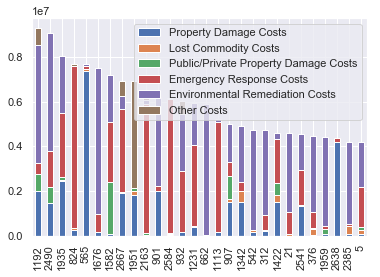

In [53]:
# Top28 accident excluding outliers:
df4 = df.copy()
a = round(1/100 * 2795)
b = round(2/100 * 2795)
c = df4['All Costs'].sort_values(ascending=False) [a:b]

Top28 = df.iloc[c.index, 41:-2]
Top28.plot.bar(stacked=True)

# New dataset for prediction

In [127]:
s = pd.Series([4,8,9,17,23,24,47,22,48])

newdf = df3[df3.columns[s[:,]]].copy()
#newdf = newdf.dropna(axis=1)
print(newdf.shape)
newdf.head()

(2655, 9)


,Operator ID,Pipeline Type,Liquid Type,Cause Category,Liquid Ignition,Liquid Explosion,All Costs,Net Loss (Barrels),Shutdown Duration
0,32109,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",INCORRECT OPERATION,NO,NO,1627,21.0,NaN
1,15786,ABOVEGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,NO,NO,4008,0.0,NaN
2,20160,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MATERIAL/WELD/EQUIP FAILURE,NO,NO,200,2.0,NaN
3,11169,UNDERGROUND,CRUDE OIL,NATURAL FORCE DAMAGE,NO,NO,11540,0.0,NaN
4,300,UNDERGROUND,CRUDE OIL,EXCAVATION DAMAGE,NO,NO,29650,2.0,NaN


In [55]:
newdf.cov() # is not easily readable!

,Operator ID,All Costs,Net Loss (Barrels),Shutdown Duration
Operator ID,1.544173e+08,-3.690902e+07,5.016924e+05,1.578112e+05
All Costs,-3.690902e+07,5.384464e+11,1.794086e+08,1.140722e+08
Net Loss (Barrels),5.016924e+05,1.794086e+08,1.124396e+06,4.046218e+04
Shutdown Duration,1.578112e+05,1.140722e+08,4.046218e+04,7.813597e+05


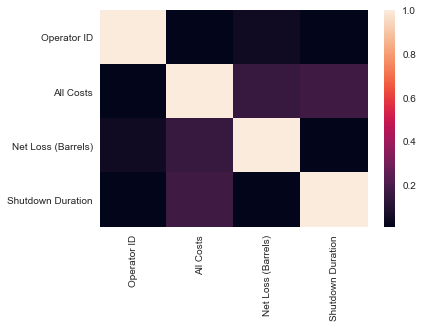

In [128]:
corr = newdf.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values) # really bad result!

# One-hot encoding & Value replacement

In [129]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

newdf['Pipeline Type'] = newdf['Pipeline Type'].astype(str) # because there are different objects in this column:
lb_results = lb.fit_transform(newdf['Pipeline Type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Liquid Type'] = newdf['Liquid Type'].astype(str)
lb_results = lb.fit_transform(newdf['Liquid Type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Cause Category'] = newdf['Cause Category'].astype(str)
lb_results = lb.fit_transform(newdf['Cause Category'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Operator ID'] = newdf['Operator ID'].astype(str)
lb_results = lb.fit_transform(newdf['Operator ID'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Liquid_Ignition_int'] = np.nan
newdf.loc[newdf['Liquid Ignition'] == 'YES', 'Liquid_Ignition_int'] = 1
newdf.loc[newdf['Liquid Ignition'] == 'NO', 'Liquid_Ignition_int'] = 0

newdf['Liquid Explosion_int'] = np.nan
newdf.loc[newdf['Liquid Explosion'] == 'YES', 'Liquid Explosion_int'] = 1
newdf.loc[newdf['Liquid Explosion'] == 'NO', 'Liquid Explosion_int'] = 0

print(newdf.shape)
newdf.T

(2795, 237)


,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
Operator ID,32109.0,15786.0,20160.0,11169.0,300.0,nan,26041.0,12624.0,26041.0,31684.0,...,32147.0,32080.0,30829.0,31684.0,32011.0,32334.0,4906.0,39145.0,32147.0,30829.0
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,NaN,TANK,ABOVEGROUND,ABOVEGROUND,TANK,...,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,TANK,UNDERGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,nan,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL
Cause Category,INCORRECT OPERATION,MATERIAL/WELD/EQUIP FAILURE,MATERIAL/WELD/EQUIP FAILURE,NATURAL FORCE DAMAGE,EXCAVATION DAMAGE,nan,MATERIAL/WELD/EQUIP FAILURE,NATURAL FORCE DAMAGE,MATERIAL/WELD/EQUIP FAILURE,ALL OTHER CAUSES,...,MATERIAL/WELD/EQUIP FAILURE,MATERIAL/WELD/EQUIP FAILURE,ALL OTHER CAUSES,MATERIAL/WELD/EQUIP FAILURE,CORROSION,MATERIAL/WELD/EQUIP FAILURE,ALL OTHER CAUSES,MATERIAL/WELD/EQUIP FAILURE,ALL OTHER CAUSES,INCORRECT OPERATION
Liquid Ignition,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
Liquid Explosion,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
All Costs,1627,4008,200,11540,29650,NaN,70400,413,40336,30050,...,66041,47047,65075,258510,13120,61015,105400,15050,41428,45800
Net Loss (Barrels),21,0,2,0,2,NaN,5,0.24,0,0,...,0,0,0,0,1,0,580,0,0,0
Shutdown Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,4,NaN,NaN,2,7,NaN,NaN,NaN,NaN
ABOVEGROUND,1,1,1,0,0,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
del newdf['nan']

l = len(newdf.columns)
newdf = newdf.iloc[:,6:l]

print(newdf.shape)
print(newdf.head())

(2795, 227)
   All Costs  Net Loss (Barrels)  Shutdown Duration  ABOVEGROUND  TANK  \
0     1627.0                21.0                NaN          1.0   0.0   
1     4008.0                 0.0                NaN          1.0   0.0   
2      200.0                 2.0                NaN          1.0   0.0   
3    11540.0                 0.0                NaN          0.0   0.0   
4    29650.0                 2.0                NaN          0.0   0.0   

   TRANSITION AREA  UNDERGROUND  \
0              0.0          0.0   
1              0.0          0.0   
2              0.0          0.0   
3              0.0          1.0   
4              0.0          1.0   

   BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)  CO2 (CARBON DIOXIDE)  \
0                                                0.0                      0.0   
1                                                0.0                      0.0   
2                                                0.0                      0.0   
3       

In [59]:
# Erase outliers:
newdf2 = newdf.copy()
newdf2 = newdf2.drop(newdf2.index[[194, 2103, 523, 1173, 2675]])
print(newdf2.shape)

(2790, 234)


In [131]:
# Outliers: top 5% total costs:
newdf3 = newdf.copy()
a = round(5/100 * 2795)
b = newdf3['All Costs'].sort_values(ascending=False) [:a]
newdf3 = newdf3.drop(b.index)
print(newdf3.shape)

(2655, 227)


# Dataframe selection before modeling

In [132]:
#dataframe = newdf.copy() 
#dataframe = newdf2.copy() # without 5 outliers
dataframe = newdf3.copy() # without top 1% outliers

print(dataframe.shape)
dataframe.head()

(2655, 227)


,All Costs,Net Loss (Barrels),Shutdown Duration,ABOVEGROUND,TANK,TRANSITION AREA,UNDERGROUND,BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS),CO2 (CARBON DIOXIDE),CRUDE OIL,...,5320.0,6911.0,7063.0,879.0,9175.0,99031.0,99043.0,999.0,Liquid_Ignition_int,Liquid Explosion_int
0,1627.0,21.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,4008.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,200.0,2.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,11540.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,29650.0,2.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [133]:
dataframe = dataframe.dropna(axis=0)
print(dataframe.shape)

(1094, 227)


# Modelling and regression

In [168]:
%matplotlib inline
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
import math
import sklearn.metrics as metrics

In [163]:
# Extract the X and y data from the dataframe
l = len(newdf.columns)
X = dataframe.iloc[:,1:l]
y = dataframe['All Costs']

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

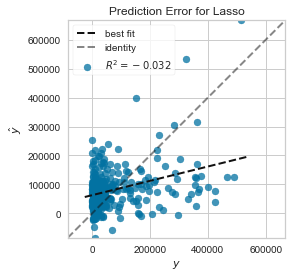

In [164]:
# Instantiate the linear model and visualizer: LASSO
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

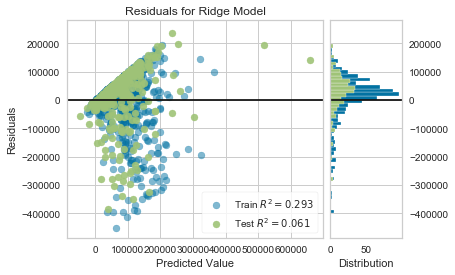

In [165]:
# Instantiate the linear model and visualizer: RIDGE
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

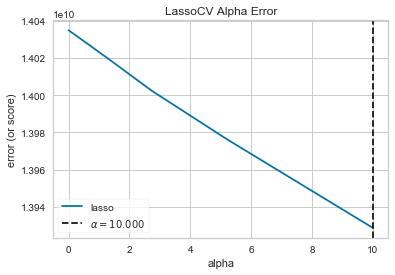

In [142]:
alphas = np.logspace(-10, 1, 40)

# Instantiate the linear model and visualizer 
model = LassoCV(alphas=alphas, cv=3)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)              # Fit the data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

In [166]:
# Extract columnson train X
X2= X
y2= y
# Model creation and fit
model1 = BaggingClassifier(KNeighborsClassifier())
model1.fit(X2,y2)
# Show model results of training set
y2_hat = model1.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("MSE:                ", math.sqrt(mse))
print ("r2:                 ", model1.score(X2,y2))
print ("n_features:         ", model1.n_features_)

TRAINING SET
MAE:                 52022.42778793419
MSE:                 110337.56051353778
r2:                  0.3610603290676417
n_features:          226


In [170]:
# AdaBoost
model2 = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(model2, X2, y2, cv=5) # cv??
scores.mean() 

0.04526970996175771

In [150]:
# Extract columnson train X
X2= X
y2= y
# Model creation and fit
model3 = RandomForestRegressor(verbose=2)
model3.fit(X2,y2)
# Show model results of training set
y2_hat = model3.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("MSE:                ", math.sqrt(mse))
print ("r2:                 ", model3.score(X2,y2))
print ("feature_importances:", model3.feature_importances_)
print ("n_features:         ", model3.n_features_)
print ("n_outputs:          ", model3.n_outputs_)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
TRAINING SET
MAE:                 25917.847874771483
MSE:                 44532.837238399414
r2:                  0.8497181542043111
feature_importances: [1.10495336e-01 3.24030391e-01 1.99024901e-02 2.09301224e-02
 3.80601527e-05 1.72597182e-02 0.00000000e+00 2.08369605e-03
 1.24503695e-02 4.64952813e-03 3.21948036e-02 2.03380515e-03
 2.44015451e-02 9.79179892e-03 6.88455005e-03 1.36074194e-02
 7.86443920e-03 2.81311651e-03 1.28684957e-03 1.27528239e-05
 7.15738124e-05 8.46371266e-03 2.80079628e-05 2.60086109e-03
 3.13711740e-03 2.95142911e-04 7.05645778e-05 7.03444273e-04
 9.35593190e-05 0.00000000e+00 0.00000000e+00 1.85882808e-04
 9.11084803e-04 6.34868904e-06 0.00000000e+00 8.69173942e-03
 1.72805621e-02 0.00000000e+00 1.65027998e-03 4.65832758e-03
 0.00000000e+00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Conclusion